In [1]:
from app.dataManager import *
import math
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.30/02


In [2]:
def valid_sample_condition(name):
    return 'Showering' not in name and 'Sub-GeV' not in name and 'pi^{0}' not in name and '*' not in name

def get_counts(ana_master):
    tot_counts = []
    for i in range(len(ana_master.samples)):
        s = ana_master.samples[i]
        if valid_sample_condition(s.name):
            tot_counts += list(get_counts_from_hist(ana_master.samples[i].data_hist))
    return tot_counts

In [3]:
data = AnaMaster()
for i in range(len(data.samples)):
    data.samples[i].set_SK_true_data_as_data_hist()

Reaction Name: MCNumuBar
Reaction Name: MCNutau
Reaction Name: MCNC
Reaction Name: MCNue
Reaction Name: MCNumu
Reaction Name: MCNueBar
Reaction Name: MCTotal
MASK BINS:  True
Loading Density profile from: /Users/cjesus/AtmInKamioka/config/full.PREM.dat


/Users/cjesus/AtmInKamioka/app/dataManager.py:535: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  self.data_hist.SetBinContent(int(local_bin_idx+1), int(df.iloc[global_bin_idx]))
/Users/cjesus/AtmInKamioka/app/dataManager.py:535: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  self.data_hist.SetBinContent(int(local_bin_idx+1), int(df.iloc[global_bin_idx]))
/Users/cjesus/AtmInKamioka/app/dataManager.py:535: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  self.data_hist.SetBinContent(int(local_bin_idx+1), int(df.iloc[global_bin_idx]))
/Users/cjesus/AtmInKamioka/app/dataManager.py:535: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0])

In [22]:
step_t23 = 0.08
list_of_t23 = np.arange(0.35, 0.65+step_t23, step_t23)
len(list_of_t23)

5

In [26]:
step_t23 = 0.02
list_of_t23 = np.arange(0.35, 0.65+step_t23, step_t23)

results = []
for t23 in list_of_t23:

    print('t23: ', t23)
    osc_pred = AnaMaster()
    
    osc_pred.OscProb.t23 = t23
    osc_pred.osc_weight_all()
    osc_pred.fill_histograms()
    
    all_chi2 = []
    
    for i in range(len(osc_pred.samples)):
        
        s = osc_pred.samples[i]
        if valid_sample_condition(s.name):
    
            observed = get_counts_from_hist(data.samples[i].data_hist)
            expected = get_counts_from_hist(osc_pred.samples[i].data_hist)
    
            for E,O in zip(observed, expected):
                all_chi2.append((E-O)+O*np.log(O/E))
    
    all_chi2 = np.reshape(all_chi2,-1)

    results.append(np.sum(all_chi2))

t23:  0.35
Reaction Name: MCNumuBar
Reaction Name: MCNutau
Reaction Name: MCNC
Reaction Name: MCNue
Reaction Name: MCNumu
Reaction Name: MCNueBar
Reaction Name: MCTotal
MASK BINS:  True
t23:  0.37
Reaction Name: MCNumuBar
Reaction Name: MCNutau
Reaction Name: MCNC
Reaction Name: MCNue
Reaction Name: MCNumu
Reaction Name: MCNueBar
Reaction Name: MCTotal
MASK BINS:  True
t23:  0.39
Reaction Name: MCNumuBar
Reaction Name: MCNutau
Reaction Name: MCNC
Reaction Name: MCNue
Reaction Name: MCNumu
Reaction Name: MCNueBar
Reaction Name: MCTotal
MASK BINS:  True
t23:  0.41000000000000003
Reaction Name: MCNumuBar
Reaction Name: MCNutau
Reaction Name: MCNC
Reaction Name: MCNue
Reaction Name: MCNumu
Reaction Name: MCNueBar
Reaction Name: MCTotal
MASK BINS:  True
t23:  0.43000000000000005
Reaction Name: MCNumuBar
Reaction Name: MCNutau
Reaction Name: MCNC
Reaction Name: MCNue
Reaction Name: MCNumu
Reaction Name: MCNueBar
Reaction Name: MCTotal
MASK BINS:  True
t23:  0.45000000000000007
Reaction Name:

Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNC (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNutau (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNumuBar (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNumu (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNueBar (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*Data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 1 d.e.*  MCNC (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 1 d.e.*  MCNutau (Potential memory leak).
Warning in <TROOT::Ap

(0.0, 9.995240535468389)

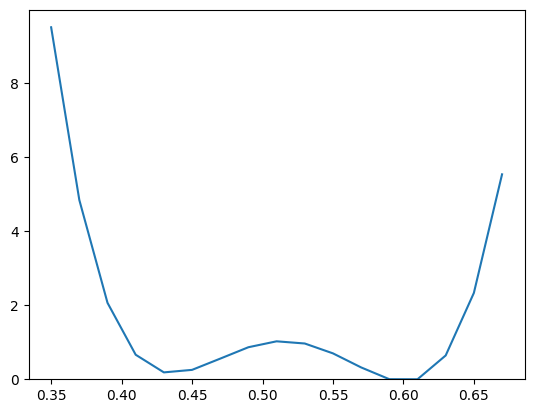

In [28]:
plt.plot(list_of_t23, results-min(results))

plt.gca().set_ylim(0)
#results

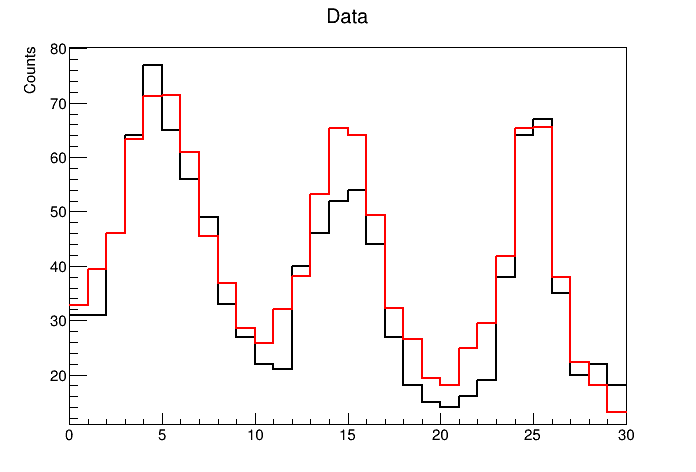

In [19]:
n = 11

c=ROOT.TCanvas()
c.cd()
data.samples[n].data_hist.Draw("HIST")
osc_pred.samples[n].data_hist.SetLineColor(ROOT.kRed)
osc_pred.samples[n].data_hist.Draw("HIST same")

c.Draw()